<a href="https://colab.research.google.com/github/ov29/Regression_project/blob/main/Ornel_Vojka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Application in Spinal Implant Identification

In [ ]:
# !nvidia-smi

## Get the data

A very crucial step at the beginning of any machine learning project is becoming one with the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Implant_data/train


Isola  Legacy  M8M10  Reline  Viper  Xia


In [ ]:
!ls /content/drive/MyDrive/Implant_data/test/Xia

67_side.jpg	       facebook_7386_ML.jpg	spinal_xray_846_ML.jpg
71.jpg		       facebook_7786_ML.jpg	spinal_xray_888__AP.jpg
facebook_10347_ML.jpg  facebook_8495_ML.jpg	xia1_ap_email_22feb1831.jpg
facebook_2150_ML.jpg   facebook_914_ML.jpg	xia1_ml_email_27feb1513.jpg
facebook_449_ML.jpg    facebook_9622_ML.jpg	xia1_ml_whatzit_23feb2021.png
facebook_5665_ML.jpg   spinal_xray_2551_ML.jpg


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
ls

 Akram/  'Colab Notebooks'/   Implant_data/  'School '/


In [ ]:
!ls /content/drive/MyDrive/Implant_data/test/Reline

facebook_681_ML.jpg		reline6_ap_email_22feb1831.jpg
reline1_ml_email_22feb1831.jpg	reline8_ap_email_22feb1831.jpg
reline2_ap_email_22feb1830.jpg	reline_xray1.png
reline2_ap_email_22feb1831.jpg	s_195_4.jpg


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames, in os.walk('Implant_data'):
  print('There are ',len(dirnames), 'directories and ', len(filenames), 'images in',dirpath)

There are  2 directories and  0 images in Implant_data
There are  6 directories and  0 images in Implant_data/train
There are  0 directories and  66 images in Implant_data/train/Isola
There are  0 directories and  121 images in Implant_data/train/Legacy
There are  0 directories and  149 images in Implant_data/train/Viper
There are  0 directories and  50 images in Implant_data/train/M8M10
There are  0 directories and  83 images in Implant_data/train/Xia
There are  0 directories and  73 images in Implant_data/train/Reline
There are  6 directories and  0 images in Implant_data/test
There are  0 directories and  11 images in Implant_data/test/M8M10
There are  0 directories and  35 images in Implant_data/test/Viper
There are  0 directories and  8 images in Implant_data/test/Reline
There are  0 directories and  17 images in Implant_data/test/Xia
There are  0 directories and  26 images in Implant_data/test/Legacy
There are  0 directories and  13 images in Implant_data/test/Isola


In [ ]:
num_train_data = len(os.listdir('/content/drive/MyDrive/Implant_data/test/'))
num_train_data

6

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
import random
import matplotlib.image as mpimg

data_dir = pathlib.Path('Implant_data/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names

array(['Isola', 'Legacy', 'M8M10', 'Reline', 'Viper', 'Xia'], dtype='<U6')

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

In [ ]:
def view_random_image(target_dir):

  fig , axes = plt.subplots(2,3,figsize=(15, 15))
  
  for i,ax in enumerate(axes.flat):
    target_folder = target_dir + class_names[i]
    random_image = random.sample(os.listdir(target_folder),1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    ax.imshow(img)
    tit=class_names[i]
    ax.set_title(tit)
    ax.axis('off')    

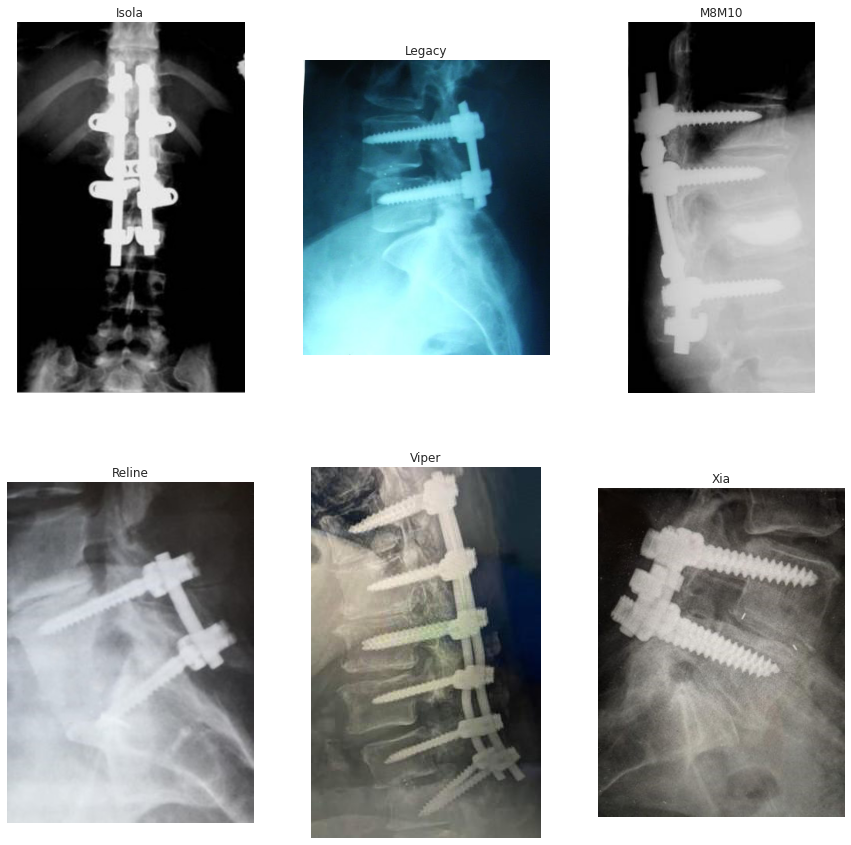

In [ ]:
view_random_image('Implant_data/train/')

In [ ]:
len_train_data={}
len_test_data={}

for i in os.listdir('/content/drive/MyDrive/Implant_data/train'):
  len_train_data[i] = len(os.listdir('/content/drive/MyDrive/Implant_data/train'+'/'+i))

for i in os.listdir('/content/drive/MyDrive/Implant_data/test'):
  len_test_data[i] = len(os.listdir('/content/drive/MyDrive/Implant_data/test'+'/'+i))

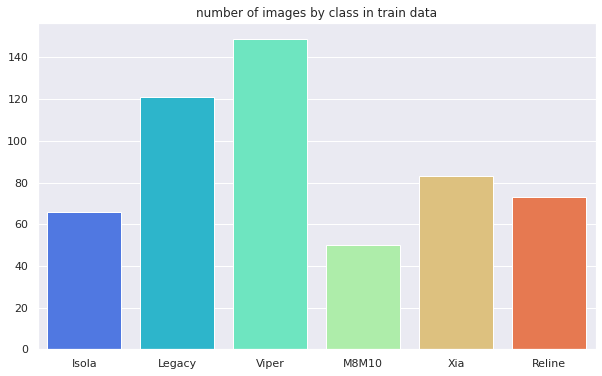

In [ ]:
plt.figure(figsize=(10,6))
plt.title('number of images by class in train data')

sns.barplot(x=list(len_train_data.keys()),y=list(len_train_data.values()),palette="rainbow")
sns.set_theme()

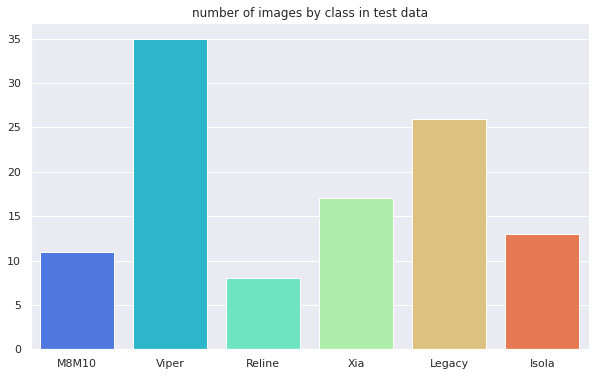

In [ ]:
plt.figure(figsize=(10,6))
plt.title('number of images by class in test data')
sns.barplot(x=list(len_test_data.keys()),y=list(len_test_data.values()),palette="rainbow")
sns.set_theme()

In [ ]:
dimensions=np.array([])
dim =[]

for name in class_names:
  for i in os.listdir('/content/drive/MyDrive/Implant_data/train/'+'/'+name):
    image_dim=np.array([])
    img = mpimg.imread('/content/drive/MyDrive/Implant_data/train/'+'/'+name+'/'+i)
    if len(img.shape)==2:
      img=img.reshape(img.shape+(1,)) 
    image_dim=np.append(image_dim,list((img.shape)))
    image_dim=np.append(image_dim,name)
    dim.append(image_dim)


In [ ]:
shapes_df = pd.DataFrame(dim,columns=('w','h','c','class'))
shapes_df[['w','h','c']]=shapes_df[['w','h','c']].astype(float)
shapes_df[['w','h','c']]=shapes_df[['w','h','c']].astype(int)

shapes_df.head()

,w,h,c,class
0,600,368,3,Isola
1,600,219,3,Isola
2,361,219,4,Isola
3,600,499,3,Isola
4,768,331,4,Isola


In [ ]:
shapes_df['c'].value_counts()

3    480
4     61
1      1
Name: c, dtype: int64

In [ ]:
shapes_df.fillna(1,inplace=True)

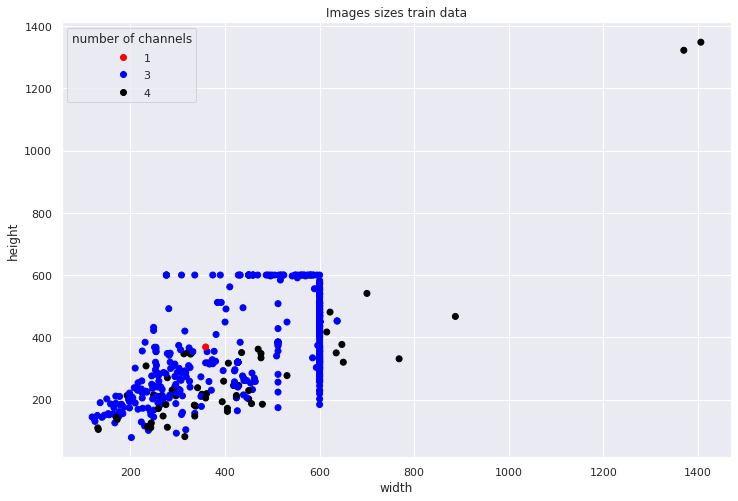

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Images sizes train data')
plt.xlabel('width')
plt.ylabel('height')

scatter = plt.scatter(x=shapes_df['w'],y=shapes_df['h'],c=list(shapes_df.c),cmap='flag')
plt.legend(*scatter.legend_elements(),title='number of channels')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


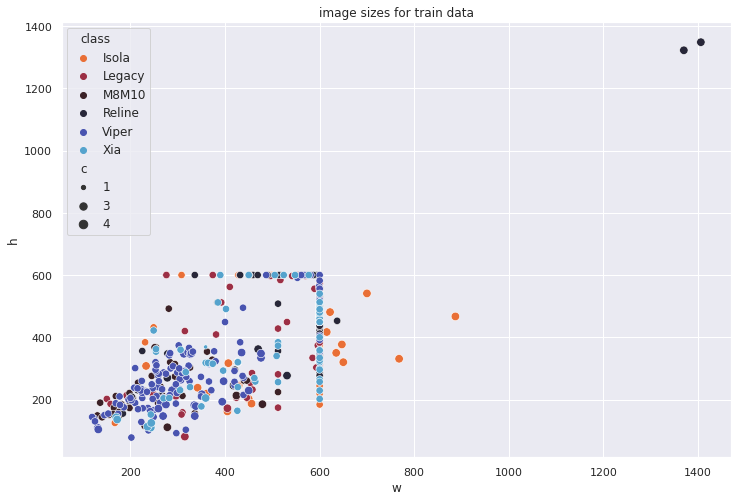

In [ ]:
plt.figure(figsize=(12,8))
plt.title('image sizes for train data')

sns.scatterplot('w', 'h', data=shapes_df, hue='class',palette='icefire_r',size='c')

In [ ]:
dim_test =[]

for name in class_names:
  for i in os.listdir('/content/drive/MyDrive/Implant_data/test/'+'/'+name):
    image_dim=np.array([])
    img = mpimg.imread('/content/drive/MyDrive/Implant_data/test/'+'/'+name+'/'+i)
    if len(img.shape)==2:
      img=img.reshape(img.shape+(1,)) 
    image_dim=np.append(image_dim,list((img.shape)))
    image_dim=np.append(image_dim,name)
    dim_test.append(image_dim)


In [ ]:
shapes_df_test = pd.DataFrame(dim_test,columns=('w','h','c','class'))
shapes_df_test[['w','h','c']]=shapes_df_test[['w','h','c']].astype(float)
shapes_df_test[['w','h','c']]=shapes_df_test[['w','h','c']].astype(int)

shapes_df_test.head()

,w,h,c,class
0,427,320,3,Isola
1,381,223,4,Isola
2,682,347,4,Isola
3,372,228,4,Isola
4,231,302,3,Isola


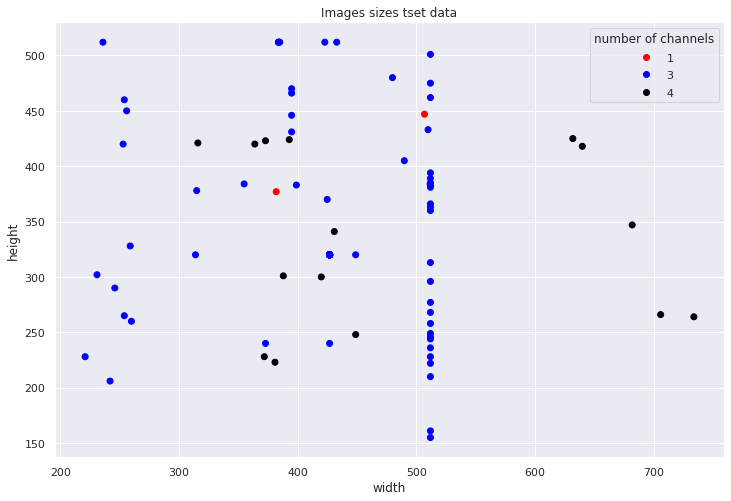

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Images sizes tset data')
plt.xlabel('width')
plt.ylabel('height')

scatter = plt.scatter(x=shapes_df_test['w'],y=shapes_df_test['h'],c=list(shapes_df_test.c),cmap='flag')
plt.legend(*scatter.legend_elements(),title='number of channels')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


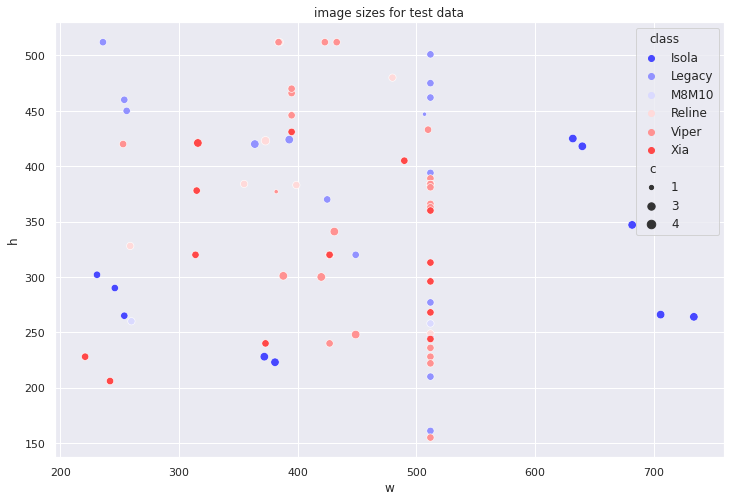

In [ ]:
plt.figure(figsize=(12,8))
plt.title('image sizes for test data');
sns.scatterplot('w', 'h', data=shapes_df_test, hue='class',palette='bwr',size='c');

In [ ]:
imageWithOneChannel=mpimg.imread('/content/drive/MyDrive/Implant_data/train/Xia/spinal_xray_525_ML.jpg')
imageWithOneChannel.shape

(359, 369)

an example of image with one channel


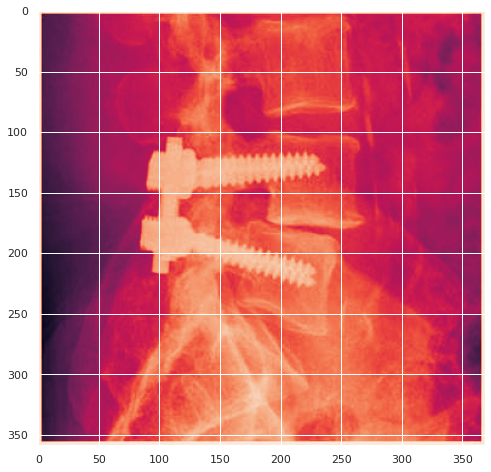

In [ ]:
print('an example of image with one channel')
plt.figure(figsize=(12,8))
plt.imshow(imageWithOneChannel);